### Retails Case Study

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

#### Customer Data

In [3]:
customer = pd.read_csv("Customer.csv")
customer

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


##### Exploratory Data Analysis

In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [16]:
customer.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code'], dtype='object')

In [13]:
customer.shape

(5647, 4)

#### Transaction Data

In [18]:
Transaction = pd.read_csv("Transactions.csv")
Transaction

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [19]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [20]:
Transaction.shape

(23053, 10)

In [21]:
Transaction.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type'],
      dtype='object')

#### Product Cat Data

In [22]:
Product_cat = pd.read_csv("prod_cat_info.csv")
Product_cat.head(2) 

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [23]:
Product_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   prod_cat_code     23 non-null     int64 
 1   prod_cat          23 non-null     object
 2   prod_subcat_code  23 non-null     int64 
 3   prod_subcat       23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [24]:
Product_cat.shape

(23, 4)

In [25]:
Product_cat.columns

Index(['prod_cat_code', 'prod_cat', 'prod_subcat_code', 'prod_subcat'], dtype='object')

### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly. 

In [26]:
semi_final_data = pd.merge(left = Transaction,right =Product_cat,on = ['prod_cat_code','prod_subcat_code'] ,how = 'inner')
semi_final_data

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women
2,73713102191,268867,15-02-2014,1,1,1,714,74.970,788.970,MBR,Clothing,Women
3,57134739558,270625,14-02-2014,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women
4,79536458466,271944,12/2/2014,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,31795262740,275166,1/2/2011,1,4,4,531,223.020,2347.020,e-Shop,Bags,Mens
23049,85848725285,271131,1/2/2011,1,4,5,1043,547.575,5762.575,e-Shop,Bags,Mens
23050,12933894691,272706,31-01-2011,1,4,5,361,189.525,1994.525,MBR,Bags,Mens
23051,6442732971,273698,30-01-2011,1,4,1,1470,154.350,1624.350,e-Shop,Bags,Mens


In [27]:
final_data = pd.merge(left = semi_final_data,right = customer,left_on = 'cust_id' ,right_on = 'customer_Id',how = 'left')
final_data.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,80712190438,270351,20-02-2014,1,1,5,772,405.3,4265.3,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0


In [28]:
cust_final = final_data.loc[:,['customer_Id','DOB','Gender','city_code', 'transaction_id','tran_date','Store_type','prod_subcat_code','prod_subcat','prod_cat_code','prod_cat','Qty', 'Rate', 'Tax',
       'total_amt']]

### 2. Prepare a summary report for the merged data set.  

#### a. Get the column names and their corresponding data types

In [29]:
cust_final.dtypes

customer_Id           int64
DOB                  object
Gender               object
city_code           float64
transaction_id        int64
tran_date            object
Store_type           object
prod_subcat_code      int64
prod_subcat          object
prod_cat_code         int64
prod_cat             object
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
dtype: object

In [30]:
cust_final['customer_Id']= cust_final.customer_Id.astype('object')
cust_final['transaction_id']= cust_final.transaction_id.astype('object')
cust_final['tran_date'] = pd.to_datetime(cust_final.tran_date)
cust_final['DOB'] = pd.to_datetime(cust_final.DOB)

#### b. Top/Bottom 10 observations

In [31]:
cust_final.head(5)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,Store_type,prod_subcat_code,prod_subcat,prod_cat_code,prod_cat,Qty,Rate,Tax,total_amt
0,270351,1981-09-26,M,5.0,80712190438,2014-02-28,e-Shop,1,Women,1,Clothing,-5,-772,405.300,-4265.300
1,270351,1981-09-26,M,5.0,80712190438,2014-02-20,e-Shop,1,Women,1,Clothing,5,772,405.300,4265.300
2,268867,1987-10-24,F,4.0,73713102191,2014-02-15,MBR,1,Women,1,Clothing,1,714,74.970,788.970
3,270625,1992-03-02,M,6.0,57134739558,2014-02-14,TeleShop,1,Women,1,Clothing,5,595,312.375,3287.375
4,271944,1971-11-12,F,5.0,79536458466,2014-12-02,e-Shop,1,Women,1,Clothing,2,996,209.160,2201.160


In [32]:
cust_final.tail(5)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,Store_type,prod_subcat_code,prod_subcat,prod_cat_code,prod_cat,Qty,Rate,Tax,total_amt
23048,275166,1970-05-11,M,10.0,31795262740,2011-01-02,e-Shop,1,Mens,4,Bags,4,531,223.020,2347.020
23049,271131,1976-02-07,F,9.0,85848725285,2011-01-02,e-Shop,1,Mens,4,Bags,5,1043,547.575,5762.575
23050,272706,1974-09-03,M,8.0,12933894691,2011-01-31,MBR,1,Mens,4,Bags,5,361,189.525,1994.525
23051,273698,1974-06-06,F,1.0,6442732971,2011-01-30,e-Shop,1,Mens,4,Bags,1,1470,154.350,1624.350
23052,269539,1992-03-20,F,7.0,32904823908,2011-01-26,MBR,1,Mens,4,Bags,4,455,191.100,2011.100


#### c. Frequency tables for all the continious variables

In [33]:
cust_final.describe()

,city_code,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,23045.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,5.482534,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002
std,2.863499,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264
min,1.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,3.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000
50%,5.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000
75%,8.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000
max,10.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


#### d. Frequency tables for all the categorical variables 

In [34]:
cust_final.select_dtypes('object').describe()

,customer_Id,Gender,transaction_id,Store_type,prod_subcat,prod_cat
count,23053,23044,23053,23053,23053,23053
unique,5506,2,20878,4,18,6
top,269449,M,4170892941,e-Shop,Women,Books
freq,13,11811,4,9311,3048,6069


In [35]:
cust_final.dtypes

customer_Id                 object
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
transaction_id              object
tran_date           datetime64[ns]
Store_type                  object
prod_subcat_code             int64
prod_subcat                 object
prod_cat_code                int64
prod_cat                    object
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
dtype: object

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables. 

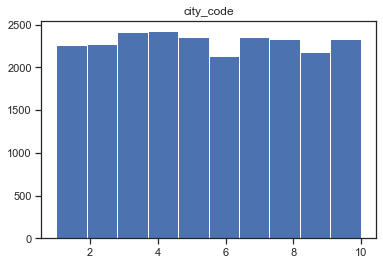

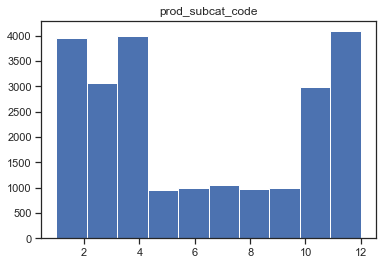

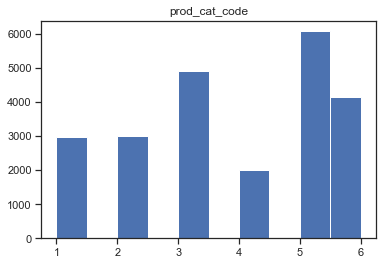

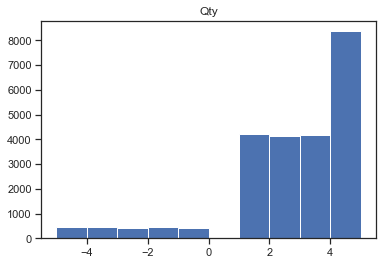

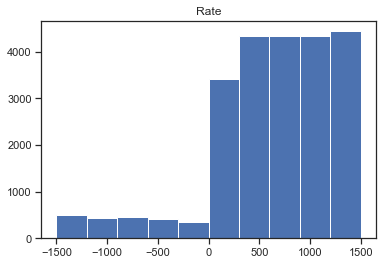

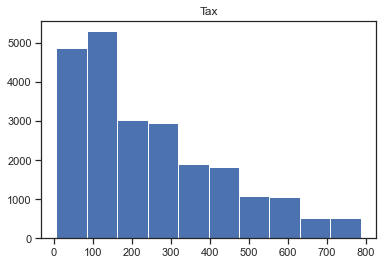

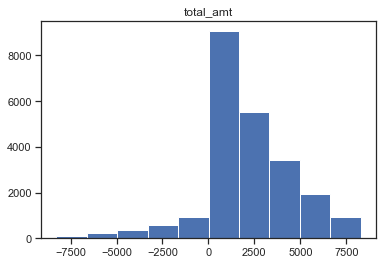

In [17]:
#Continious variables

for x in cust_final.select_dtypes(['int','float']):
    plt.hist(cust_final[x])
    plt.title(x)
    plt.show()

### Frequency Bar for Catagorical

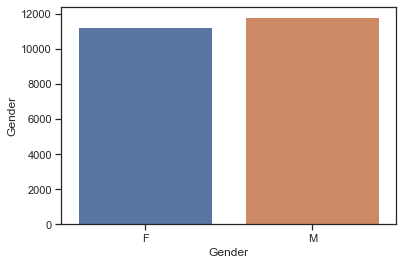

In [18]:
output = cust_final.groupby(cust_final.Gender)['Gender'].agg('count')
sns.barplot(x=output.index, y=output)
plt.show()

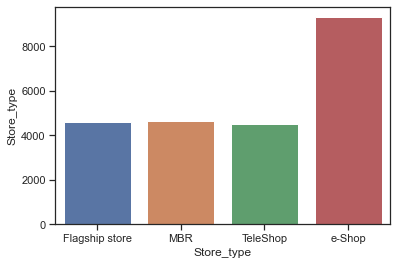

In [37]:
output = cust_final.groupby(cust_final.Store_type)['Store_type'].agg('count')
sns.barplot(x=output.index, y=output)
plt.show()

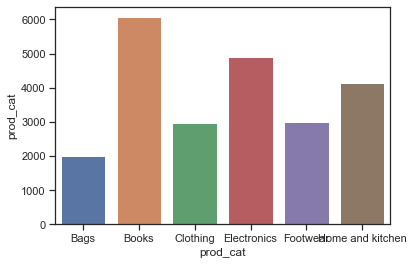

In [40]:
output = cust_final.groupby(cust_final.prod_cat)['prod_cat'].agg('count')
sns.barplot(x=output.index, y=output)
plt.show()

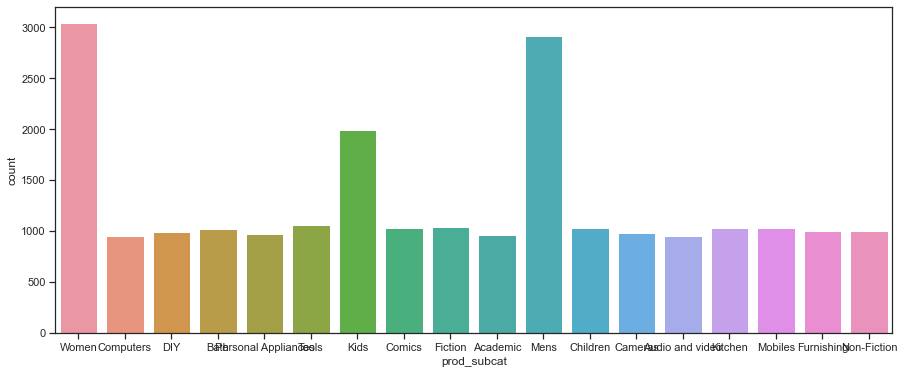

In [47]:
plt.figure(figsize = (15,6))
sns.countplot(x=cust_final.prod_subcat)
plt.show()

### 4. Calculate the following information using the merged dataset 

#### a. Time period of the available transaction data

In [61]:
from_date = cust_final.tran_date.sort_values(ascending = True).head(1).reset_index(drop = True)

In [64]:
to_date = cust_final.tran_date.sort_values(ascending = True).tail(1).reset_index(drop = True)

In [66]:
print(f"Transaction data is available from  {from_date[0]} to {to_date[0]}")

Transaction data is available from  2011-01-02 00:00:00 to 2014-12-02 00:00:00


#### b. Count of transactions where the total amount of transaction was negative 

In [69]:
cust_final[cust_final.total_amt <0].shape[0]

2177

### 5. Analyze which product categories are more popular among females vs male customers. 

In [70]:
cust_final.pivot_table(index = 'prod_cat',columns = ['Gender'] ,values = 'customer_Id' ,aggfunc = 'count').sort_values(by = 'M' ,ascending = False,axis = 0)

Gender,F,M
prod_cat,,
Books,2949,3116
Electronics,2328,2570
Home and kitchen,1994,2134
Clothing,1439,1518
Footwear,1529,1469
Bags,994,1004


### 6. Which City code has the maximum customers and what was the percentage of customers from that city? 

In [71]:
max_ = cust_final.pivot_table(index = 'city_code',values = 'customer_Id',aggfunc = 'count').sort_values(by = 'customer_Id',ascending = False)
max_.reset_index(inplace = True)
max_['percent'] = round((max_.customer_Id/(cust_final['customer_Id'].count()))*100,2)
max_.head(1)

,city_code,customer_Id,percent
0,4.0,2422,10.51


### 7. Which store type sells the maximum products by value and by quantity?

In [81]:
cust_final.pivot_table(index = 'Store_type',values = ['Qty','Rate'],aggfunc = sum).reset_index().sort_values(by=['Qty','Rate'],ascending = False).head(1)

,Store_type,Qty,Rate
3,e-Shop,22763,5941001


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores? 

In [82]:
sal = cust_final.groupby(['Store_type','prod_cat']).total_amt.agg(sum).reset_index()

In [83]:
sal[(sal.Store_type == 'Flagship store') & (sal.prod_cat.isin(['Electronics','Clothing'])) ]

,Store_type,prod_cat,total_amt
2,Flagship store,Clothing,1194423.23
3,Flagship store,Electronics,2215136.04


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [84]:
cust_final[(cust_final.Gender == "M") & (cust_final.prod_cat == "Electronics" )].total_amt.sum()

5703109.425

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts? 

In [92]:
trans = cust_final[cust_final.total_amt > 0].pivot_table(index = ('customer_Id'),values = 'transaction_id',aggfunc= 'count')

In [93]:
trans.reset_index(inplace = True)

In [98]:
trans[trans.transaction_id > 10].count()

customer_Id       6
transaction_id    6
dtype: int64

### 11. For all customers aged between 25 - 35, find out:

##### Creating a new column for age

In [100]:
d = pd.Timestamp.now()

In [101]:
cust_final['Age'] =  (d.year - (cust_final.DOB.dt.year))

#### data between age 25 - 35

In [102]:
b = cust_final[(cust_final.Age >=25) & (cust_final.Age <=35)]

#### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [103]:
c =b[(b.prod_cat == 'Electronics') |  (b.prod_cat =='Books')].pivot_table(index = 'prod_cat',values = 'total_amt',aggfunc= sum).reset_index().round()
print(f" Total amount in category {c.prod_cat[0]} is Rs. {c.total_amt[0]} \n Total amount in category {c.prod_cat[1]} is Rs. {c.total_amt[1]}")

 Total amount in category Books is Rs. 3174083.0 
 Total amount in category Electronics is Rs. 2883921.0


#### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [104]:
a = b[(b.tran_date >= '2014-01-01') & (b.tran_date <= '2014-03-01')].total_amt.sum() 

In [105]:
print(f"Total amount spent by the customer betweer 1st Jan, 2014 to 1st Mar, 2014 is Rs.{a} ")

Total amount spent by the customer betweer 1st Jan, 2014 to 1st Mar, 2014 is Rs.428230.595 
